# Bloxplots

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Datasets/Air_Quality.csv', sep=',')

In [3]:
df_limpiar = df.copy()
df_Dropped = df_limpiar.dropna(axis=1, how='all')
df_Dropped

df_3 = df_Dropped.copy()

def revisar_secuencia_index():
    indices_actuales = df_3.index
    #Crear una secuencia esperada (por ejemplo, una secuencia numérica)
    secuencia_esperada = pd.Index(range(indices_actuales.min(), indices_actuales.max() + 1))

    # Comparar
    if indices_actuales.equals(secuencia_esperada):
        print("La secuencia de índices es la esperada.")
    else:
        print("La secuencia de índices ha cambiado.")
revisar_secuencia_index()

df_Limpio= df_3.reset_index(drop = True)
df_Limpio

column_name_mapping = {
'Unique ID': 'ID ', 
'Indicator ID': 'ID Indicador', 
'Name':'Tipo Contaminante', 
'Measure': 'Medida', 
'Measure Info': 'Info Medida',
'Geo Type Name': 'Tipo Geografico', 
'Geo Join ID': 'ID Geografico', 
'Geo Place Name' :'Lugar Geografico' , 
'Time Period': 'Periodo Tiempo' ,
'Start_Date': 'Fecha Inicio', 
'Data Value': 'Valor'
}

df_TablaLimpia = df_Limpio.rename(columns= column_name_mapping)
df_TablaLimpia['Fecha Inicio'] = pd.to_datetime(df_TablaLimpia['Fecha Inicio'] )
df_TablaLimpia.head(5)


La secuencia de índices es la esperada.


,ID,ID Indicador,Tipo Contaminante,Medida,Info Medida,Tipo Geografico,ID Geografico,Lugar Geografico,Periodo Tiempo,Fecha Inicio,Valor
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,2013-06-01,34.64
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,2014-06-01,33.22
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,2013-06-01,31.25
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,2014-06-01,31.15
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,2008-12-01,5.89


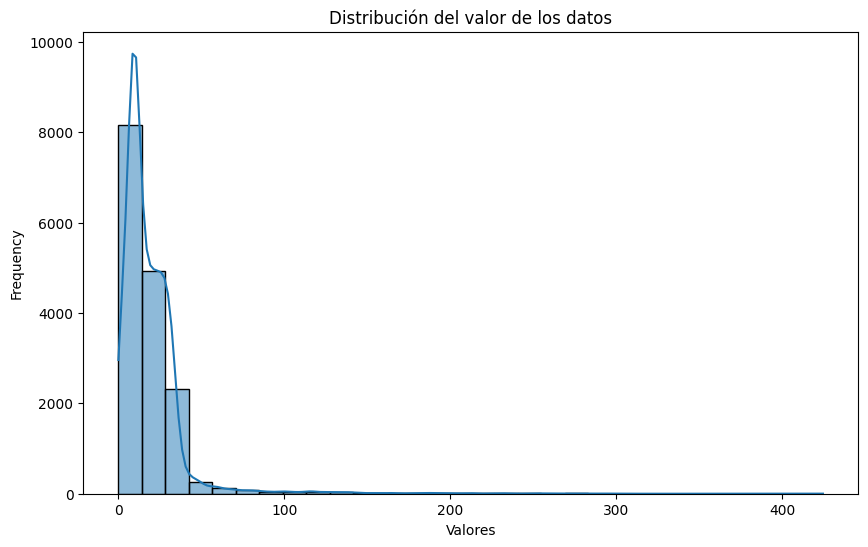

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df_TablaLimpia['Valor'], bins=30, kde=True)
plt.title('Distribución del valor de los datos')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

KeyError: 'Tipo Geografico'

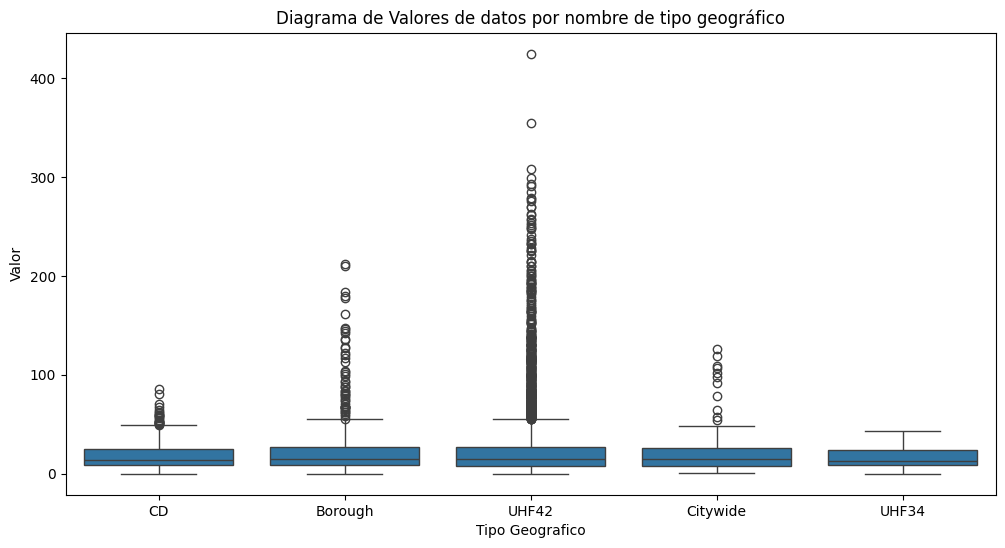

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tipo Geografico', y='Valor', data=df_TablaLimpia)
plt.title('Diagrama de Valores de datos por nombre de tipo geográfico')
plt.xlabel('Tipo Geografico')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()